In [1]:
# import packages
# Additional imports
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle
import pandas as pd
import nilearn
import sklearn

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Get pickled searchlight data
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

f = open('/work/fMRI_data/FaceWordData/WordFace_searchlight_1.pkl', 'rb')
searchlight = pickle.load(f)
f.close()
print(searchlight)

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 10:43:12
SearchLight(cv=10, estimator=LinearSVC(dual='auto', max_iter=2000),
            mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f8ccc236040>,
            n_jobs=-1,
            process_mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f8b851a68e0>,
            radius=5, verbose=10)
Finishing cell: 10:43:20


/home/coder/.local/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 1.3.0 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Starting cell: 10:43:54
(193, 235, 198)


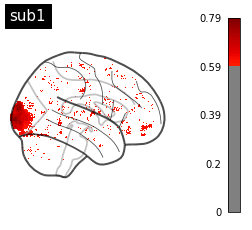

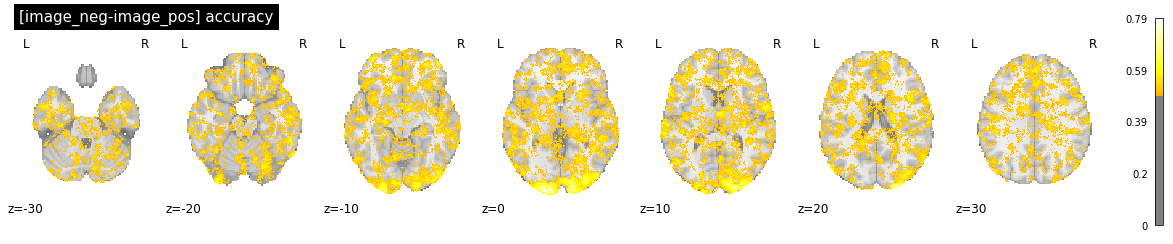

Finishing cell: 10:43:59


In [3]:
# Plot searchlight for one participant

from nilearn.plotting import plot_glass_brain, plot_stat_map
from nilearn.image import new_img_like
import numpy as np

from nilearn import plotting
import matplotlib.pyplot as plt
mask_wb_filename='/work/fMRI_data/FaceWordData/BIDS/derivatives/sub-0054/anat/sub-0054_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

searchlight_img = new_img_like(mask_wb_filename, searchlight.scores_)
print(searchlight_img.shape)


plot_glass_brain(searchlight_img, cmap='jet',colorbar=True, threshold=0.6,
                              title=('sub1'),
                              plot_abs=False, display_mode='x')

   
#plt.suptitle('Classification accuracy (unc Acc>0.6)')
plt.show()

plot_stat_map(searchlight_img, cmap='cold_hot',threshold=0.5, cut_coords=[-30,-20,-10,0,10,20,30],
              display_mode='z',  black_bg=False,
              title='[image_neg-image_pos] accuracy')
plt.show()

# Saving the objects:
#f = open('/work/MikkelWallentin#6287/WordFace_first_level_models_all_trials_searchlight_all_par.pkl', 'wb')
#pickle.dump([searchlight_all, searchlight_img], f)
#f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

In [4]:
# Load searchlight maps for all participants

from nilearn.image import new_img_like, math_img
N_par=21
searchlight_all= np.empty((N_par, 0)).tolist()
searchlight_all=[]
searchlight_demean=[]
conditions_label_all= np.empty((N_par, 0)).tolist()
for i in range(0,N_par):
    text = "Loading file %d\n" % (i+1)
    print(text)
    file_name='/work/fMRI_data/FaceWordData/WordFace_searchlight_'+str(i)+'.pkl'
    f = open(file_name, 'rb')
    searchlight = pickle.load(f)
    searchlight_img = new_img_like(mask_wb_filename, searchlight.scores_)
    searchlight_all.append(searchlight_img)
    searchlight_demean.append(math_img("(img1-0.5)*img2",img1=searchlight_img,img2=mask_wb_filename))
    
    #searchlight_all[i]=searchlight
    f.close()


print(searchlight_all[1])
            
now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Loading file 1



/home/coder/.local/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 1.3.0 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading file 2

Loading file 3

Loading file 4

Loading file 5

Loading file 6

Loading file 7

Loading file 8

Loading file 9

Loading file 10

Loading file 11

Loading file 12

Loading file 13

Loading file 14

Loading file 15

Loading file 16

Loading file 17

Loading file 18

Loading file 19

Loading file 20

Loading file 21


<class 'nibabel.nifti1.Nifti1Image'>
data shape (193, 235, 198)
affine:
[[   1.       0.       0.     -96.   ]
 [   0.       0.977    0.    -132.   ]
 [   0.       0.       0.977  -78.   ]
 [   0.       0.       0.       1.   ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 193 235 198   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim         

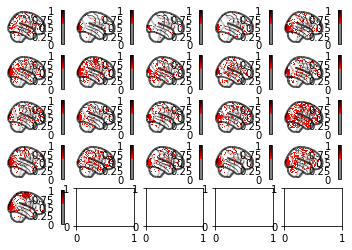

In [5]:
# Plot searchlight data for each participant individually

import matplotlib.pyplot as plt

from nilearn import plotting

#subjects = data["ext_vars"]["participant_id"].tolist()
fig, axes = plt.subplots(nrows=5, ncols=5)
for cidx, map in enumerate(searchlight_all):
    plotting.plot_glass_brain(
        map,
        colorbar=True,
        threshold=0.6,
        vmin=0.5,
        vmax=1,
        title=None,
        axes=axes[int(cidx / 5), int(cidx % 5)],
        plot_abs=False,
        display_mode="x",
    )
plt.show()

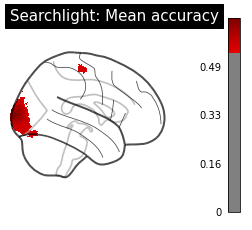

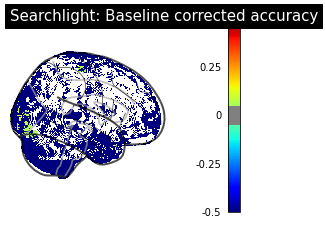

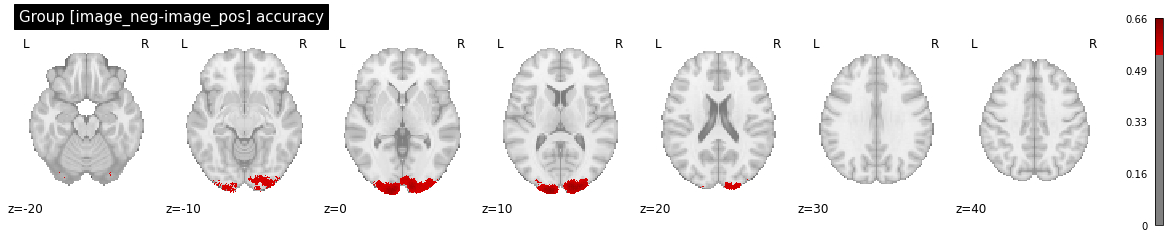

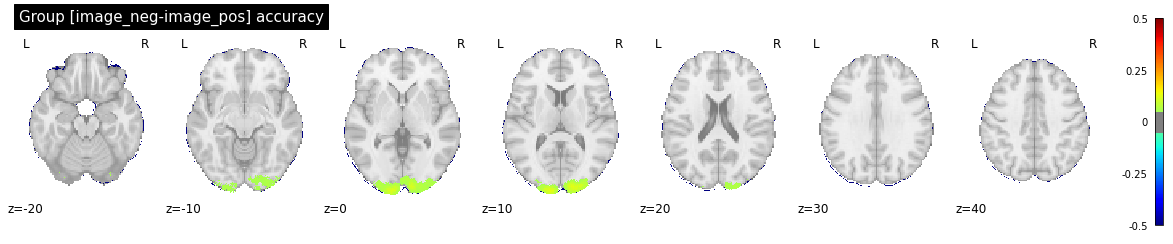

In [6]:
# Plot searchlight mean accuracy, baseline corrected accuracy and image_neg-image_pos accuracy

from nilearn.image import new_img_like,  mean_img, concat_imgs

#Concatenate beta maps
searchlight_conc=concat_imgs(searchlight_all)
# Make a mean image
searchlight_mean=mean_img(searchlight_conc)
#Concatenate baseline corrected maps
searchlight_conc_de=concat_imgs(searchlight_demean)
# Make a mean of the baseline-corrected image
searchlight_mean_demean=mean_img(searchlight_conc_de)

plot_glass_brain(searchlight_mean, cmap='jet',colorbar=True, threshold=0.55,
                              title=('Searchlight: Mean accuracy'),
                              plot_abs=False, display_mode='x')

plot_glass_brain(searchlight_mean_demean, cmap='jet',colorbar=True, threshold=0.05,vmin=0,
                              title=('Searchlight: Baseline corrected accuracy'),
                              plot_abs=False, display_mode='x')


plot_stat_map(searchlight_mean, cmap='jet',threshold=0.55, cut_coords=[-20,-10,0,10,20,30,40],
              display_mode='z',  black_bg=False,
              title='Group [image_neg-image_pos] accuracy')
plt.show()
plot_stat_map(searchlight_mean_demean, cmap='jet',threshold=0.05, cut_coords=[-20,-10,0,10,20,30,40],
              display_mode='z',  black_bg=False,
              title='Group [image_neg-image_pos] accuracy')
plt.show()

In [7]:
# Apply second level model

from nilearn.glm.second_level import SecondLevelModel
import pandas as pd

second_level_input = searchlight_demean
design_matrix = pd.DataFrame(
    [1] * len(second_level_input),
    columns=["intercept"],
)

second_level_model = SecondLevelModel(smoothing_fwhm=6.0, n_jobs=2)
second_level_model = second_level_model.fit(
    second_level_input,
    design_matrix=design_matrix,
)

z_map = second_level_model.compute_contrast(
    second_level_contrast="intercept",
    output_type="z_score",
)

/home/coder/.local/lib/python3.9/site-packages/nilearn/glm/_utils.py:346: RuntimeWarning: divide by zero encountered in divide
  return np.where(X <= 0, 0, 1.0 / X)


The p<0.001 threshold is 3.09
The FDR=.05 threshold is 2.61
The p<.05 Bonferroni-corrected threshold is 5.57


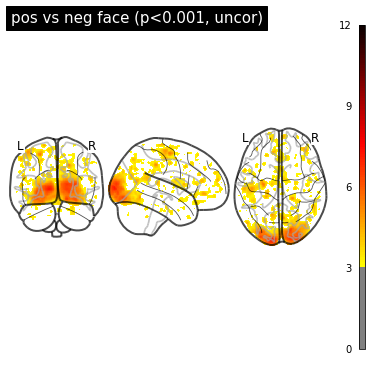

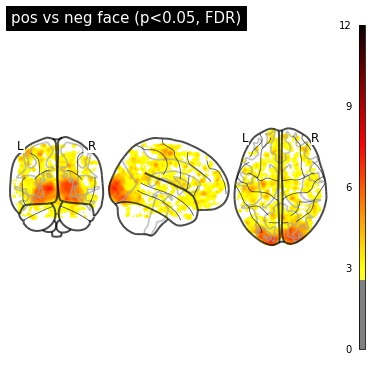

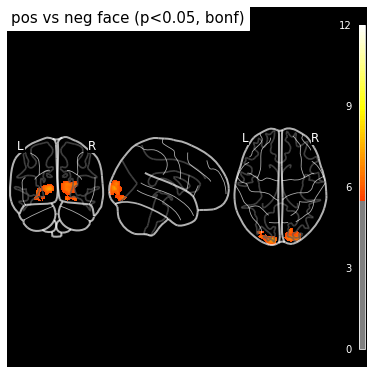

In [12]:
# Plot group level seachlight with various thresholds

from scipy.stats import norm
from nilearn.image import threshold_img
from nilearn.glm import threshold_stats_img

p_val = 0.001
p001_unc = norm.isf(p_val)
print(f"The p<0.001 threshold is {p001_unc:.3g}")

thresholded_map2, threshold2 = threshold_stats_img(
    z_map, alpha=0.05, height_control="fdr"
)
print(f"The FDR=.05 threshold is {threshold2:.3g}")

thresholded_map3, threshold3 = threshold_stats_img(
    z_map, alpha=0.05, height_control="bonferroni"
)
print(f"The p<.05 Bonferroni-corrected threshold is {threshold3:.3g}")

#Remove negative effects from image (they are meaningless)
z_map_disp=threshold_img(
    z_map,
    threshold=0,
    two_sided=False,
)



display = plotting.plot_glass_brain(
    z_map_disp,
    threshold=p001_unc, # changed this from 4 to p001_unc which is the actual threshold for p < 0.001.
    vmin=0,
    vmax=12,
    colorbar=True,
    symmetric_cbar=False,
    #display_mode="x",
    plot_abs=False,
    title="pos vs neg face (p<0.001, uncor)",
    figure=plt.figure(figsize=(5, 5)),
)
plotting.show()

display = plotting.plot_glass_brain(
    z_map_disp,
    threshold=threshold2,
    vmin=0,
    vmax=12,
    colorbar=True,
    symmetric_cbar=False,
    #display_mode="x",
    plot_abs=False,
    title="pos vs neg face (p<0.05, FDR)",
    figure=plt.figure(figsize=(5, 5)),
)
plotting.show()

display = plotting.plot_glass_brain(
    z_map_disp,
    threshold=threshold3,
    vmin=0,
    vmax=12,
    colorbar=True,
    black_bg=True,
    #cmap="spring",
    symmetric_cbar=False,
    #display_mode="x",
    plot_abs=False,
    title="pos vs neg face (p<0.05, bonf)",
    figure=plt.figure(figsize=(5, 5)),
)
plotting.show()

In [ ]:
# create table of significant regions

from atlasreader import create_output

create_output(z_map_disp, voxel_thresh=threshold3, cluster_extent=0,direction='both')